# Homework 10

## Name: Nils Huber

# Problem 1: One day at GAFO 03/378 

GAFO 03/378 is an office where Frederike and Anastasiia are working on theoretical models of how neutrinos are emitted from a special class of astrophysical sources called blazars. A task that is proposed to you is inspired by a real-physicist-life example. 

Neutrinos are neutral particles that interact only weakly and have very litte mass. Therefore, they are perfect "messengers" that can carry information from the far ends of the Universe. The flip side of the coin is that they are hard to detect and require detectors of enourmous size.

Let's assume that your theory predicts a spectrum of neutrinos coming from some distant source. How many neutrino events (i.e. detected neutrinos) will that create in a detector like IceCube? We can estimate this as

$$N_\nu = \frac{1}{3} \cdot T \cdot \int \Phi_\nu (E) \; A_{\textrm{eff}}(E)\; \textrm{d}E$$


where:

$N_\nu$ is the expected number of the neutrino events;

$T$ is a time of observation or duration of neutrino signal if it was observed completely;

$\Phi_\nu$ is neutrino flux as a function of energy, also called neutrino spectrum;

$A_{\textrm{eff}}$  is effective area of the detector (in our case IceCube), this parameter describes the efficency of the detector in detecting a muon neutrino with energy $E$;

$E$ is the neutrino energy.

If you're curious why 1/3 appears in the formula, the answer is following: neutrino oscillations. Neutrinos from far sources travel so long distances that when they arrive at Earth highly mixed, their flavor composition is $\nu_e : \nu_\mu : \nu_\tau = 1:1:1$ no matter what was their composition at the source. Most of the detectors, howewer, are very sensitive to only one flavor and have much worse sensitivity to all other flavors, therefore, it is roughly the same at taking only 1/3 of all-flavor neutrino flux.

**(A)** There are two files provided with this homework: ```IceCube_effective_area.csv``` and ```neutrino_spectrum_hw10.csv```. The first one contains two columns corresponding to the neutrino energy in __TeV__ and effective area in __m$^2$__ respectively. The second one has information on neutrino energy (first column, __eV__) and neutrino flux (second column, __erg/cm$^2$/s__).


Read these two files and be careful with the headers and the number of columns. When reading the files, remember that there are ways to skip the first line in order to read only the data.

Create two plots next to each other, one for each data file in log-log scale to check what you're given. Remember the important points for making a good plot (e.g. axes labels as always is a minimum requirement to show the plot to other people). (1 P) 

C:\Users\Nils Huber\AppData\Local\Temp\ipykernel_15668\1884260598.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


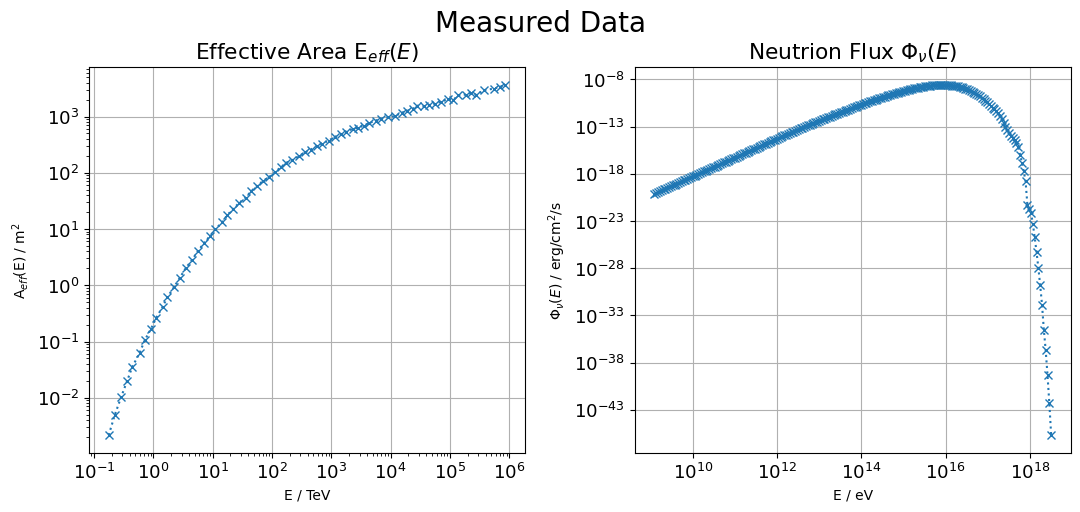

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

#Import data

file_icecube='IceCube_effective_area.csv'
file_spectrum='neutrino_spectrum_hw10.csv'

df_ic=pd.read_csv(file_icecube,header=None)
df_spec=pd.read_csv(file_spectrum,header=0)
data_ic=df_ic.to_numpy()
x_ic,y_ic=np.hsplit(data_ic,2)
data_sp=df_spec.to_numpy()
x_sp,y_sp=np.hsplit(data_sp,2)

x_ic=x_ic.flatten()
y_ic=y_ic.flatten()
x_sp=x_sp.flatten()
y_sp=y_sp.flatten()

#plot
plt.rcParams['font.size'] = 13
plt.rcParams['axes.labelsize'] = 10

def simple_log_plot(ax:plt.axis,xdata:np.array,ydata:np.array,xlabel:str,ylabel:str,title:str):
    if len(xdata)>400:
        fmt='-'
    else:
        fmt='x:'
    mask = ydata!=0

    ax.plot(xdata[mask],ydata[mask],fmt)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(which='major',visible=True)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax

#IceCube
ic_xl='E / TeV'
ic_yl=r'A$_{eff}$(E) / m$^2$'

#Spectrum
sp_xl='E / eV'
sp_yl=r'$\Phi_{\nu}(E)$ / erg/cm$^2$/s'

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(11,5))
ax_ic=simple_log_plot(ax1,x_ic,y_ic,ic_xl,ic_yl,r'Effective Area E$_{eff}(E)$')
ax_sp=simple_log_plot(ax2,x_sp,y_sp,sp_xl,sp_yl,r'Neutrion Flux $\Phi_{\nu}(E)$')
fig.tight_layout()
fig.suptitle('Measured Data',va='baseline',size=20)
fig.show()



**(B)** Both your data files consist of points. What happens if you need value of the effective area at $E_\nu$ = _X_ eV but this point is not in the given array? Right, interpolation!

Make two functions that interpolate the given data and that will be used in your integration. Before you rush into implementing them, consider following:

$$N_\nu (\textrm{dimensionless}) = \frac{1}{3} \cdot T \, \textrm{[s]} \cdot \int \Phi_\nu \, \left[\frac{\textrm{erg}}{\textrm{cm}^2 \cdot \textrm{s}} \right] \; A_{\textrm{eff}} \,[\textrm{m}^2] \textrm{d}E \,[\textrm{eV}] $$

It doesn't seem to work because the energy units don't cancel out, right? So the correct way to do the integration is to change flux units (and corresponding values) to

$$N_\nu (\textrm{dimensionless}) = \frac{1}{3} \cdot T \, \textrm{[s]} \cdot \int \frac{\Phi_\nu}{E^2} \, \left[\frac{\textrm{erg}}{\textrm{cm}^2 \cdot \textrm{s} \cdot \textrm{eV}^2} \right] \; A_{\textrm{eff}} \,[\textrm{m}^2] \textrm{d}E \,[\textrm{eV}] $$

Use 
$$1 \textrm{m}^2 = 10^4\, \textrm{cm}^2$$
and
$$1 \textrm{erg} = 6.242 \cdot 10^{11}\, \textrm{eV}$$

to unify the units of the expression under the integral.  

Make two functions:

1. Interpolated value of $\Phi_\nu/E^2$ (that depends on neutrino energy in eV)
2. Interpolated value of $A_{\textrm{eff}}$ in cm$^2$ (that depends on neutrino energy in eV)

Plot both of them and see what happened.  (1 P) 

C:\Users\Nils Huber\AppData\Local\Temp\ipykernel_15668\1769477710.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


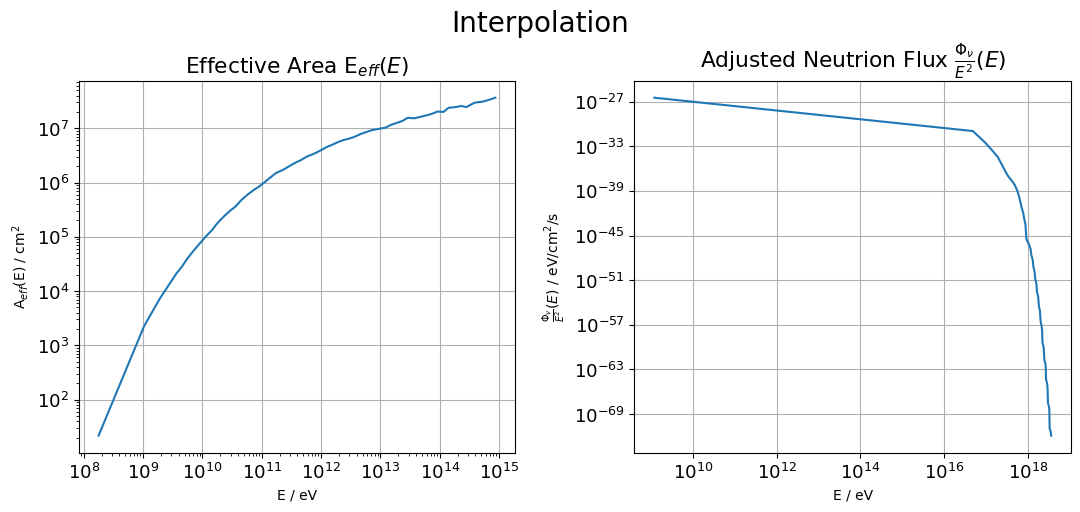

In [61]:
#unit adjsutment #exceute only once!
if x_ic[0]<1: #check to only do once
    x_ic=x_ic*1e9 #TeV->eV
    y_ic=y_ic*1e4 #m^2->cm^2
    y_sp=y_sp*6.242e11 #erg->eV
#interpolation
from scipy.interpolate import make_interp_spline as spl
#1d because else everything looks shit
a_eff=spl(x_ic,y_ic,1)
phi_nu=spl(x_sp,y_sp,1)

#plot
#IceCube updated
ic_yl=r'A$_{eff}$(E) / cm$^2$'
ic_xl='E / eV'
x_ic_cont=np.linspace(min(x_ic),max(x_ic),int(1e6))
y_ic_cont=a_eff(x_ic_cont)

#Spectrum updated
sp_yl=r'$\frac{\Phi_{\nu}}{E^2}(E)$ / eV/cm$^2$/s'
x_sp_cont=np.linspace(min(x_sp),max(x_sp),int(1e6))
y_sp_cont=phi_nu(x_sp_cont)
y_sp_cont[y_sp_cont<0]=0 #repair the negative results from the interp to be zero



fig,(ax1,ax2)=plt.subplots(1,2,figsize=(11,5))
ax_ic=simple_log_plot(ax1,x_ic_cont,y_ic_cont,ic_xl,ic_yl,r'Effective Area E$_{eff}(E)$')
ax_sp=simple_log_plot(ax2,x_sp_cont,y_sp_cont/x_sp_cont**2,sp_xl,sp_yl,r'Adjusted Neutrion Flux $\frac{\Phi_{\nu}}{E^2}(E)$')
fig.tight_layout()
fig.suptitle('Interpolation',va='baseline',size=20)

fig.show()

**(C)** Time to integrate! Calculate the integral from $10^{13}$ eV to $10^{18}$ eV using ```quad```. __Use the lambda function!__

Assume the same neutrino spectrum was emitted for 5 days. Find (and print out!) the expected number of neutrino events in IceCube during this time.  (1 P) 

In [62]:
from scipy.integrate import quad
func = lambda E: phi_nu(E)/(E**2)*a_eff(E)
lower_bound=1e13
upper_bound=1e18

integral, integral_error = quad(func, lower_bound, upper_bound)

days=5
time = days*24*60*60 #days->sec
events= integral * time/3
events_error= integral_error * time/3
print(rf'The detector detects {events:.4f} +- {events_error:.4f} in {days} days.')

The detector detects 15.5707 +- 0.0079 in 5 days.


C:\Users\Nils Huber\AppData\Local\Temp\ipykernel_15668\3038810923.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, integral_error = quad(func, lower_bound, upper_bound)


**(D)** 
For a comparison, calculate the same integral from $10^{13}$ eV to $10^{18}$ eV using an alternative integration method from scipy. Consider an appropriate method for this case and **briefly explain your choice**. 
 
Find (and print out!) the same number of expected neutrino events with 5 days of emission duration. (1 P) 

In [63]:
from scipy.integrate import trapezoid as tzp

# using trapezoid integration method because arrays are easier to check/debug for boundary behaviour

def approx(points):
    E_arr=np.linspace(1e13,1e18,points)
    func_arr=phi_nu(E_arr)/E_arr**2*a_eff(E_arr)
    #print(func_arr)
    intgrl=tzp(func_arr,E_arr)
    return intgrl*time/3


for i in np.logspace(2,6,5):
    print(f'Events with {i} points at {days} days : {approx(int(i)):.2f}')

Events with 100.0 points at 5 days : 25.12
Events with 1000.0 points at 5 days : 15.65
Events with 10000.0 points at 5 days : 15.54
Events with 100000.0 points at 5 days : 15.58
Events with 1000000.0 points at 5 days : 15.58


**(E)** Let's assume that we detected a significant excess of neutrinos in a time period around 2014, December 13. This can be approximated with a Gaussian distribution which is centered around the date with a standard deviation of 55 days.  

Plot the distribution using scipy and explicitly show mean and standard deviation values as vertical lines on the plot. Don't forget the axis labels. Make sure to add appropriate ticks on the x-axis. (1 P) 

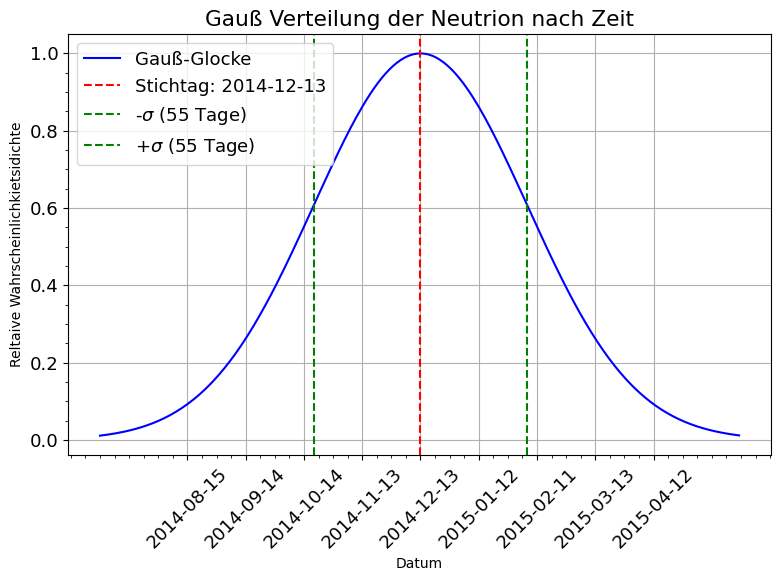

In [65]:
from scipy.stats import norm
import datetime

mean_date = datetime.datetime(2014, 12, 13)
std_days = 55

start_date = mean_date - datetime.timedelta(days=3*std_days)
end_date = mean_date + datetime.timedelta(days=3*std_days)

date_range = [start_date + datetime.timedelta(days=i) for i in range((end_date - start_date).days)]
date_numbers = np.array([(d - mean_date).days for d in date_range])

mean = 0  
std = std_days
pdf_values = norm.pdf(date_numbers, mean, std)
pdf_values = pdf_values / pdf_values.max() #normalize
# Ploting

plt.figure(figsize=(8, 6))
ax=plt.gca()
ax.minorticks_on()
plt.plot(date_range, pdf_values, label="Gauß-Glocke", color="blue")
plt.axvline(mean_date, color="red", linestyle="--", label=f"Stichtag: {mean_date.strftime('%Y-%m-%d')}")
plt.axvline(mean_date - datetime.timedelta(days=std), color="green", linestyle="--", label=rf"-$\sigma$ ({std} Tage)")
plt.axvline(mean_date + datetime.timedelta(days=std), color="green", linestyle="--", label=rf"+$\sigma$ ({std} Tage)")
plt.title("Gauß Verteilung der Neutrion nach Zeit")
plt.xlabel("Datum")
plt.ylabel("Reltaive Wahrscheinlichkietsidichte")
plt.xticks(ticks=[mean_date + datetime.timedelta(days=i*30) for i in range(-4,5)], rotation=45)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()